<a href="https://colab.research.google.com/github/nbilasals/sentiment-qris/blob/main/2020_2024_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis of QRIS in Twitter

Sentiment analysis is like a cool way of analyzing text to figure out how people feel and what they think through the use of natural language processing. The whole point is to figure out whether the text is positive, negative, or neutral. This can be very helpful for businesses that want to know how happy their customers are or for experts who want to know how the public feels.

Analyzing tweets about QRIS and Bank Indonesia is important to grasp public sentiment. Knowing if the response is positive, negative, or neutral helps policymakers understand how well QRIS-related policies are received. This insight aids Bank Indonesia in making informed decisions based on public perception.

1. Understanding Public Opinion:
Sentiment analysis helps us figure out what people think about the rules Bank Indonesia has for QRIS. Are they happy, upset, or just okay with them? This helps the people who make these rules know what the public thinks and maybe change things if needed.

2. Checking How People Use QRIS:
We can see how regular folks and businesses use QRIS through tweets. If people are having problems or liking it, we can tell. This helps Bank Indonesia see if QRIS is working well or if it needs fixing.

3. Making Sure People Know About QRIS:
Sentiment analysis can tell us if people know about QRIS and understand it. If not, Bank Indonesia can teach them better and clear up any wrong ideas.

4. Spotting Problems Early:
By looking at tweets, we can find out if there are any big problems or worries about QRIS. If lots of people are upset, it means something might be wrong, and Bank Indonesia can fix it before it becomes a big issue.

5. Helping Bank Indonesia Decide:
Sentiment analysis gives information to help Bank Indonesia make important choices. If people like QRIS, that's good news. If not, it helps figure out what needs to change so everyone is happy with it.

In [ ]:
import re
import pandas as pd
import numpy as np
import datetime as dt
import string
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
lm = nltk.WordNetLemmatizer()
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data

Given the privacy policy changes on Twitter, data gathering or scraping has limitations. The available data spans from February 2022 to February 2023. Analyzing this data provides a snapshot of public sentiment during that period regarding QRIS and Bank Indonesia.

We're using a powerful tool called BERT to understand what people are saying in comments about QRIS (Quick Response Code Indonesian Standard). BERT is like a language expert that's really good at grasping what words mean in different situations.

Now, there's a version of BERT called "Indo-BERT" that's specifically trained to understand Indonesian text. We're using this to teach the computer to figure out if comments are positive, negative, or neutral.

So, now we have labels on our data.

We take an extra step to make sure our computer is getting things right. After BERT processes the comments and assigns them a sentiment label (positive, negative, or neutral), I manually double-check these labels.

By doing this, we're making sure our analysis is accurate and reliable.

*******************************************************************************************
*******************************************************************************************

In [ ]:
# Load dataframe
df = pd.read_csv('/content/drive/MyDrive/menyala 🔥🔥/dataset/all data/preprocessed_alldata.csv')
df

,created_at,Komentar,Sentiment,Score,month_year,clean_text,normalization,final_text,token,stop_text,stem_text
0,2023-02-03 00:49:51+00:00,Semalem berhasil bayar pake QRIS https://t.co/...,neutral,0.989646,2023-02,semalem berhasil bayar pake qris,semalem berhasil bayar pakai qris,semalem berhasil bayar pakai qris,"['semalem', 'berhasil', 'bayar', 'pake', 'qris']","['semalem', 'berhasil', 'bayar', 'pake', 'qris']",semalem hasil bayar pake qris
1,2023-02-03 15:31:50+00:00,*mbeli gula* mw bayar tunai atau debit? bs pak...,negative,0.775546,2023-02,mbeli gula mw bayar tunai atau debit bs pake q...,membeli gula mau bayar tunai atau debit bisa p...,membeli gula bayar tunai atau debit bisa paka...,"['mbeli', 'gula', 'mw', 'bayar', 'tunai', 'ata...","['mbeli', 'gula', 'mw', 'bayar', 'tunai', 'deb...",mbeli gula mw bayar tunai debit bs pake qris w...
2,2023-02-04 05:24:06+00:00,Orang Kristen tidak suka bayar tunai/cash kare...,negative,0.958232,2023-02,orang kristen tidak suka bayar tunaicash karen...,orang kristen tidak suka bayar tunaicash karen...,orang kristen tidak suka bayar tunaicash karen...,"['orang', 'kristen', 'tidak', 'suka', 'bayar',...","['orang', 'kristen', 'suka', 'bayar', 'tunaica...",orang kristen suka bayar tunaicash dosa bayar ...
3,2023-02-04 05:24:06+00:00,ken arok kalo bayar pake qris mpu gandring,neutral,0.983039,2023-02,ken arok kalo bayar pake qris mpu gandring,ken arok kalau bayar pakai qris mpu gandring,arok kalau bayar pakai qris gandring,"['ken', 'arok', 'kalo', 'bayar', 'pake', 'qris...","['ken', 'arok', 'kalo', 'bayar', 'pake', 'qris...",ken arok kalo bayar pake qris mpu gandring
4,2023-02-04 05:36:21+00:00,@Askrlfess Coba diliat ditatonya nder Kali aja...,neutral,0.987434,2023-02,coba diliat ditatonya nder kali aja ada qris n...,coba diliat ditatonya nder kali saja ada qris ...,coba diliat ditatonya nder kali saja qris b...,"['coba', 'diliat', 'ditatonya', 'nder', 'kali'...","['coba', 'diliat', 'ditatonya', 'nder', 'kali'...",coba liat tato nder kali aja qris ntr bayar si...
...,...,...,...,...,...,...,...,...,...,...,...
7708,2024-06-24 04:55:11+00:00,haii haii kyu ada saldo receh nominal rahasia ...,neutral,0.975304,2024-06,haii kyu ada saldo receh nominal rahasia buat ...,haii kyu ada saldo receh nominal rahasia buat ...,haii saldo receh nominal rahasia buat yang ...,"['haii', 'kyu', 'ada', 'saldo', 'receh', 'nomi...","['haii', 'kyu', 'saldo', 'receh', 'nominal', '...",hai kyu saldo receh nominal rahasia ba qris ru...
7709,2024-06-24 06:10:37+00:00,Banyak orang gatau kalau nyari duit itu segamp...,neutral,0.869174,2024-06,banyak orang gatau kalau nyari duit itu segamp...,banyak orang tidak tahu kalau mencari uang itu...,banyak orang tidak tahu kalau mencari uang se...,"['banyak', 'orang', 'gatau', 'kalau', 'nyari',...","['orang', 'gatau', 'nyari', 'duit', 'segampang...",orang gatau nyari duit gampang main slot gacor...
7710,2024-06-24 06:23:05+00:00,Di aku ready nih kak! Murce murce all e-wallet...,neutral,0.992647,2024-06,di aku ready nih kak murce all ewallet amp qri...,di aku siap ni kak murah all ewallet amp qris ...,siap murah ewallet qris direct message ...,"['di', 'aku', 'ready', 'nih', 'kak', 'murce', ...","['ready', 'nih', 'kak', 'murce', 'all', 'ewall...",ready nih kak murce all ewallet amp qris dm or wa
7711,2024-06-24 07:09:20+00:00,mau netflix 1 bulan yg bs qris #zonauang,neutral,0.996733,2024-06,mau netflix bulan yg bs qris,mau netflix bulan yang bisa qris,netflix bulan yang bisa qris,"['mau', 'netflix', 'bulan', 'yg', 'bs', 'qris']","['netflix', 'yg', 'bs', 'qris']",netflix yg bs qris


In [ ]:
df.columns

Index(['created_at', 'Komentar', 'Sentiment', 'Score', 'month_year',
       'clean_text', 'normalization', 'final_text', 'token', 'stop_text',
       'stem_text'],
      dtype='object')

In [ ]:
df['Sentiment'].value_counts()

Sentiment
neutral     5925
negative    1023
positive     765
Name: count, dtype: int64

<ipython-input-11-7516a0a57958>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Sentiment', data=df, palette="pastel")


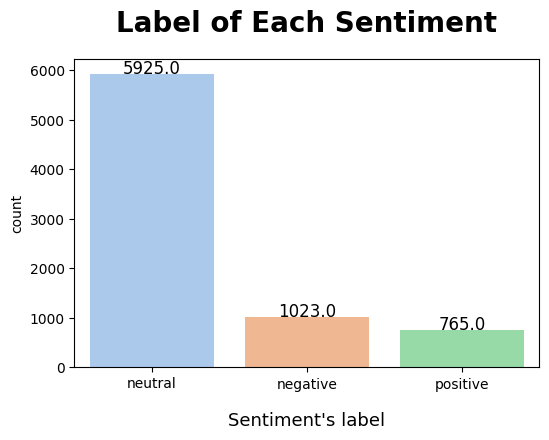

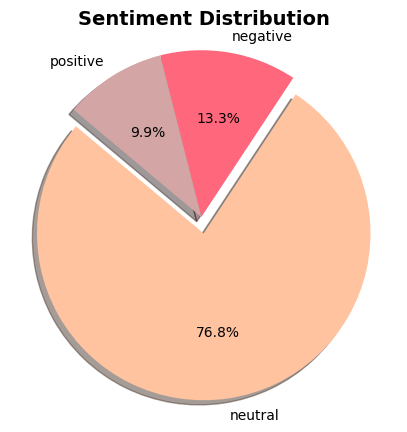

In [ ]:
# membuat visualisasi bar chart untuk menampilkan jumlah sentimen netral, positif dan negatif

fig, ax = plt.subplots(figsize=(6,4))
ax = sns.countplot(x='Sentiment', data=df, palette="pastel")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 3.25,rect.get_height(),horizontalalignment='center', fontsize = 12)

plt.title("Label of Each Sentiment", fontsize=20, fontweight='bold',pad=20)
plt.xlabel("Sentiment's label", fontsize=13, labelpad=15)
plt.ylim(0)
plt.show()

# Define data for the pie chart
# Get the value counts of sentiment labels in your DataFrame
sentiment_counts = df['Sentiment'].value_counts().to_dict()
labels = sentiment_counts.keys()
sizes = sentiment_counts.values()
colors = ['#FFC3A0', '#FF677D', '#D4A5A5']  # You can customize the colors
explode = (0.1, 0, 0)  # Explode the 1st slice (Positive)

# Create a pie chart
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
       shadow=True, startangle=140)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Sentiment Distribution", fontsize=14, fontweight='bold')
plt.show()

<ipython-input-12-485dd67373e8>:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month_year'] = df['created_at'].dt.to_period('M')  # Get month and year


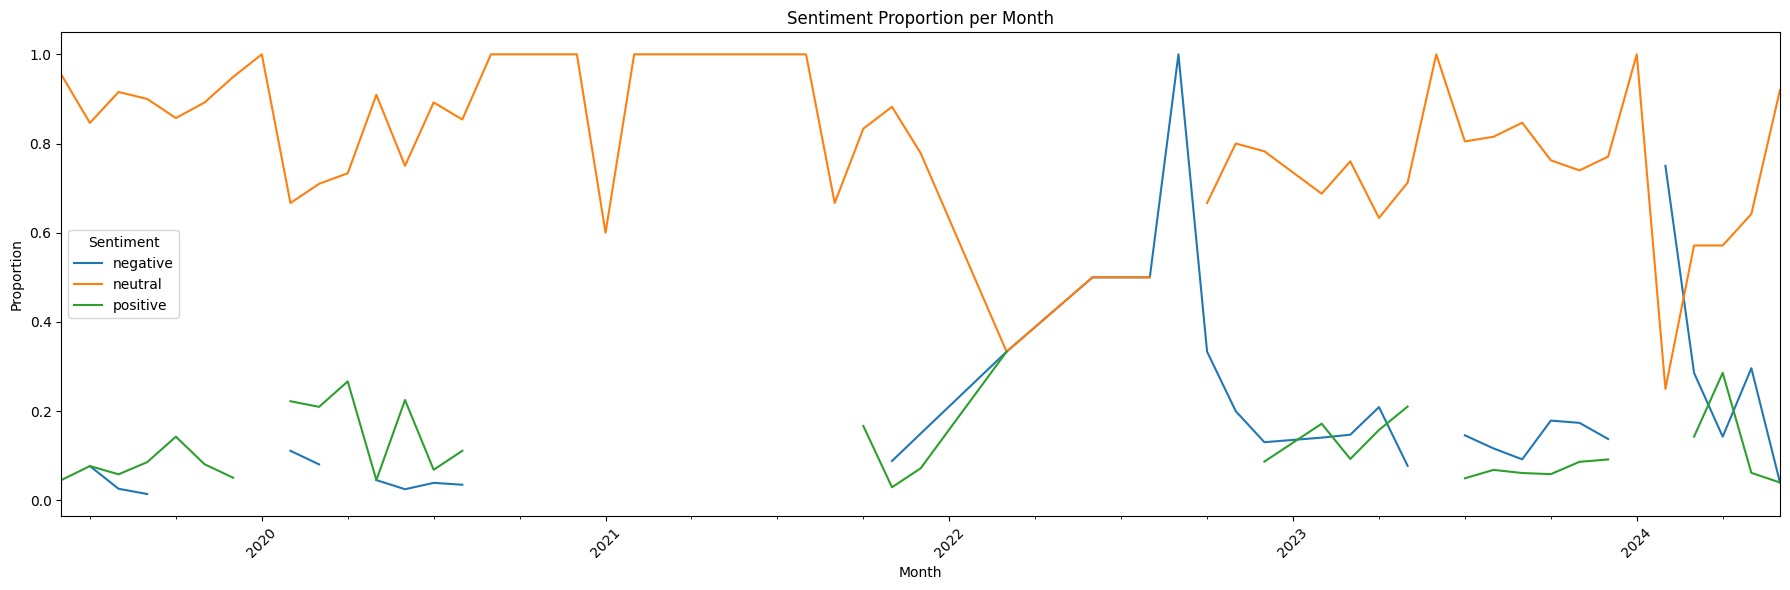

In [ ]:
#Changing over time
# Convert 'created_at' to datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Extract month and year from the 'created_at' column
df['month_year'] = df['created_at'].dt.to_period('M')  # Get month and year

# Group the data by month and sentiment
grouped_data = df.groupby(['month_year', 'Sentiment']).size().unstack()

# Calculate the proportion of each sentiment for each month
grouped_data = grouped_data.apply(lambda x: x / x.sum(), axis=1)

# Plot the proportions over time
plt.figure(figsize=(18, 6))
grouped_data.plot(kind='line', ax=plt.gca())  # Use plt.gca() to get current axis for plotting
plt.title('Sentiment Proportion per Month')
plt.xlabel('Month')
plt.ylabel('Proportion')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [ ]:
data = df[['stem_text', 'Sentiment']]

In [ ]:
data

,stem_text,Sentiment
0,semalem hasil bayar pake qris,neutral
1,mbeli gula mw bayar tunai debit bs pake qris w...,negative
2,orang kristen suka bayar tunaicash dosa bayar ...,negative
3,ken arok kalo bayar pake qris mpu gandring,neutral
4,coba liat tato nder kali aja qris ntr bayar si...,neutral
...,...,...
7708,hai kyu saldo receh nominal rahasia ba qris ru...,neutral
7709,orang gatau nyari duit gampang main slot gacor...,neutral
7710,ready nih kak murce all ewallet amp qris dm or wa,neutral
7711,netflix yg bs qris,neutral


In [ ]:
data['Sentiment'].value_counts()

Sentiment
neutral     5925
negative    1023
positive     765
Name: count, dtype: int64

In [ ]:
data['Sentiment'].fillna(0, inplace=True)

<ipython-input-16-dd21e69e3a82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment'].fillna(0, inplace=True)


## Changing sentiment values into numbers

In [ ]:
data['Sentiment'] = data['Sentiment'].replace({'positive': 0, 'neutral': 1, 'negative': 2}).astype(int)

<ipython-input-17-d4640bd8820c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment'] = data['Sentiment'].replace({'positive': 0, 'neutral': 1, 'negative': 2}).astype(int)


In [ ]:
# Use .loc to modify the DataFrame
data.loc[:, 'Sentiment'] = data['Sentiment'].replace({'positive': 0, 'neutral': 1, 'negative': 2}).astype(int)

In [ ]:
data['stem_text'] = data['stem_text'].fillna('')

<ipython-input-19-1db798bfe34a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['stem_text'] = data['stem_text'].fillna('')


## Split the text into X and y

In [ ]:
X = data['stem_text']
y = data['Sentiment']

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     test_size=0.2,
#                                                     random_state=25)

## Vectorization

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False, max_features=200000)
# vectorizer.fit(X_train)
# print('No. of feature_words: ', len(vectorizer.get_feature_names_out()))

# X_train = vectorizer.transform(X_train)
# X_test = vectorizer.transform(X_test)

# Modeling Logistic Regression

Test Size 10%
Confusion Matrix:
[[ 21  50   5]
 [  3 589  11]
 [  1  58  34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.28      0.42        76
           1       0.85      0.98      0.91       603
           2       0.68      0.37      0.48        93

    accuracy                           0.83       772
   macro avg       0.79      0.54      0.60       772
weighted avg       0.82      0.83      0.81       772





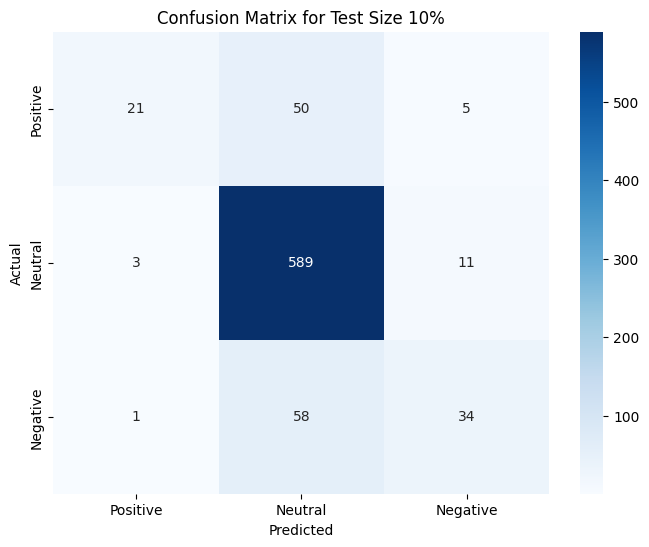

Test Size 20%
Confusion Matrix:
[[  41  107    8]
 [   7 1163   26]
 [   0  128   63]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.26      0.40       156
           1       0.83      0.97      0.90      1196
           2       0.65      0.33      0.44       191

    accuracy                           0.82      1543
   macro avg       0.78      0.52      0.58      1543
weighted avg       0.81      0.82      0.79      1543





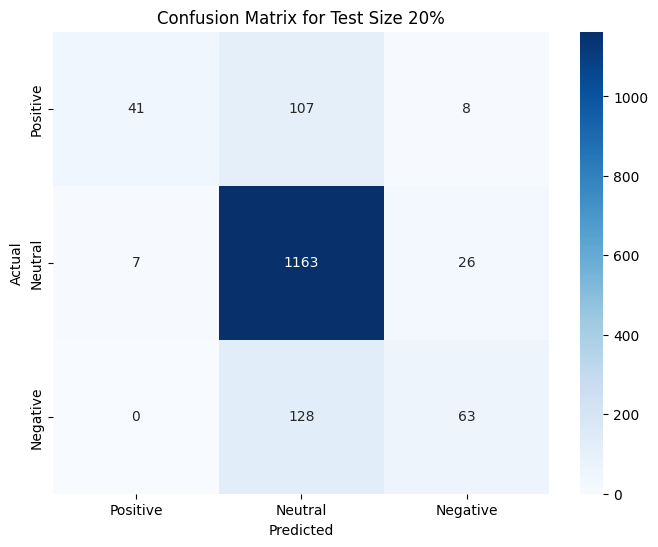

Test Size 30%
Confusion Matrix:
[[  51  186   12]
 [   8 1743   34]
 [   0  193   87]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.20      0.33       249
           1       0.82      0.98      0.89      1785
           2       0.65      0.31      0.42       280

    accuracy                           0.81      2314
   macro avg       0.78      0.50      0.55      2314
weighted avg       0.81      0.81      0.77      2314





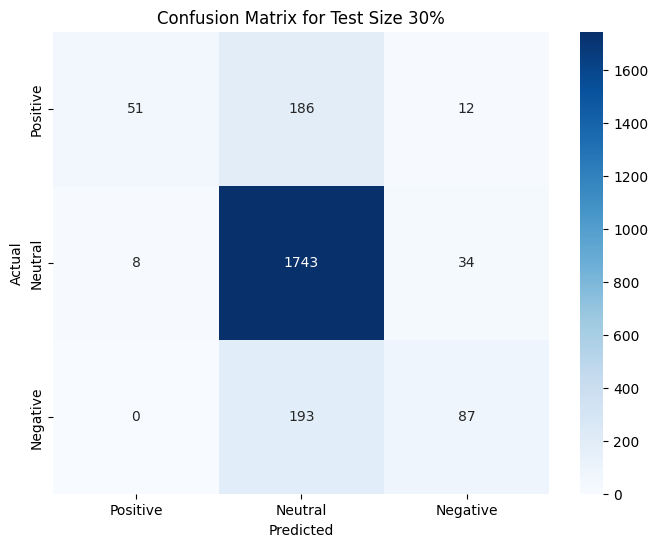

Test Size 40%
Confusion Matrix:
[[  63  248   14]
 [  13 2334   31]
 [   0  271  112]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.19      0.31       325
           1       0.82      0.98      0.89      2378
           2       0.71      0.29      0.41       383

    accuracy                           0.81      3086
   macro avg       0.79      0.49      0.54      3086
weighted avg       0.81      0.81      0.77      3086





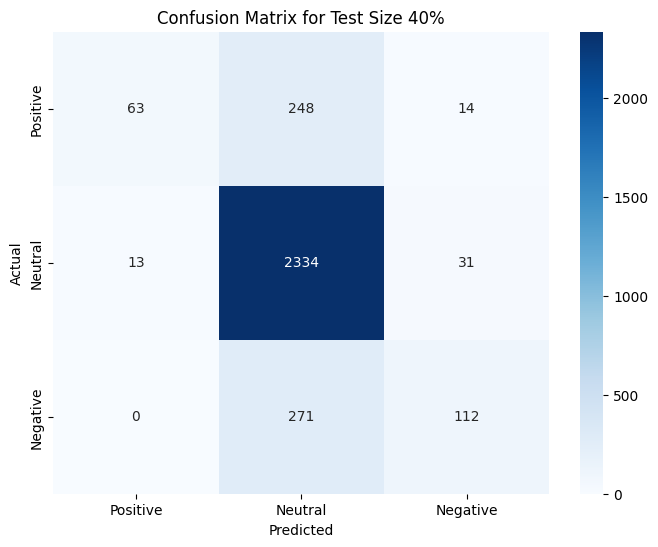

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

def evaluate_model(X_train_tfidf, X_test_tfidf, y_train, y_test):
    # Train logistic regression model
    model = LogisticRegression()
    model.fit(X_train_tfidf, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test_tfidf)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    return cm, report
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


# Vectorize text data
vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False, max_features=200000)
vectorizer.fit(X)
X_tfidf = vectorizer.transform(X)

# Define test sizes for the desired splits
test_sizes = [0.1, 0.2, 0.3, 0.4]
classes = ['Positive', 'Neutral', 'Negative']


# Evaluate the model with different splits
results = {}
for test_size in test_sizes:
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=test_size, random_state=42)

    # Evaluate model
    cm, report = evaluate_model(X_train, X_test, y_train, y_test)

    # Store results
    results[test_size] = {
        'confusion_matrix': cm,
        'classification_report': report
    }

    # Print results for the current test size
    print(f"Test Size {test_size*100:.0f}%")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(report)
    print("\n")

    # Plot confusion matrix
    plot_confusion_matrix(cm, classes, title=f'Confusion Matrix for Test Size {test_size*100:.0f}%')


# Using The Best Size

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    random_state=25)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False, max_features=200000)
vectorizer.fit(X_train)
print('No. of feature_words: ', len(vectorizer.get_feature_names_out()))

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

No. of feature_words:  9743


In [ ]:
# Define class weights
class_weights = {
    0: 5633 / 999,  # Majority class
    1: 1.0,  # Adjusted for class imbalance
    2: 5633 / 817   # Adjusted for class imbalance
}

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

logModel = LogisticRegression(multi_class='multinomial',
                              solver='lbfgs',
                              max_iter=1000,
                              penalty ='l2',
                              C=4,
                              class_weight=class_weights
                             )

# Train the model
logModel.fit(X_train, y_train)


LogisticRegression(C=4,
                   class_weight={0: 5.638638638638638, 1: 1.0,
                                 2: 6.894736842105263},
                   max_iter=1000, multi_class='multinomial')

In [ ]:
y_pred = logModel.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
report = classification_report(y_test, y_pred)

# Print classification report
print("Classification Report:")
print(report)


Accuracy: 0.7979274611398963
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.55      0.52        77
           1       0.90      0.87      0.88       589
           2       0.53      0.58      0.56       106

    accuracy                           0.80       772
   macro avg       0.64      0.67      0.65       772
weighted avg       0.81      0.80      0.80       772



# Handling Imbalance

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to oversample the minority classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
# Train logistic regression model on the oversampled data
model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

Confusion Matrix:
[[ 48  21   8]
 [ 44 497  48]
 [  9  31  66]]

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.62      0.54        77
           1       0.91      0.84      0.87       589
           2       0.54      0.62      0.58       106

    accuracy                           0.79       772
   macro avg       0.64      0.70      0.66       772
weighted avg       0.81      0.79      0.80       772



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Logistic with Word2Vec

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

Test Size 10%
Confusion Matrix:
[[  4  89   0]
 [  4 599   0]
 [  1  75   0]]
Classification Report:
              precision    recall  f1-score   support

    negative       0.44      0.04      0.08        93
     neutral       0.79      0.99      0.88       603
    positive       0.00      0.00      0.00        76

    accuracy                           0.78       772
   macro avg       0.41      0.35      0.32       772
weighted avg       0.67      0.78      0.69       772





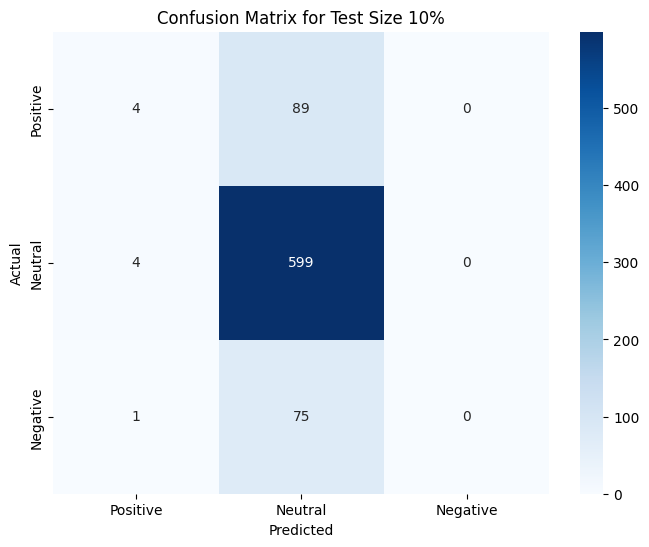

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

Test Size 20%
Confusion Matrix:
[[   6  185    0]
 [  10 1186    0]
 [   1  155    0]]
Classification Report:
              precision    recall  f1-score   support

    negative       0.35      0.03      0.06       191
     neutral       0.78      0.99      0.87      1196
    positive       0.00      0.00      0.00       156

    accuracy                           0.77      1543
   macro avg       0.38      0.34      0.31      1543
weighted avg       0.65      0.77      0.68      1543





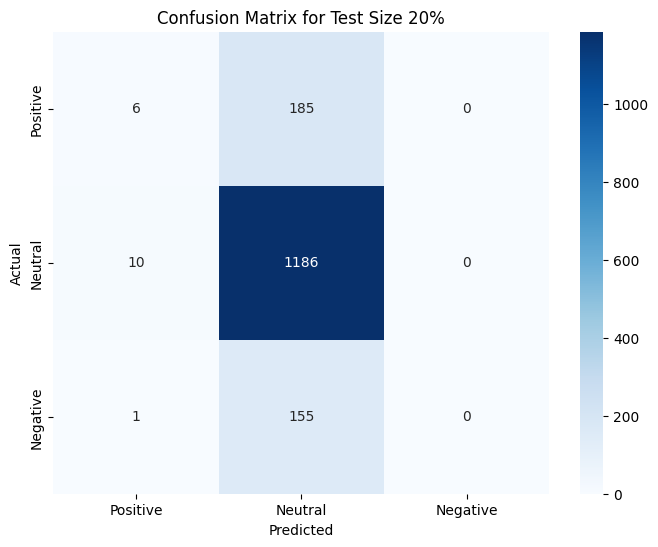

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

Test Size 30%
Confusion Matrix:
[[   7  273    0]
 [  12 1773    0]
 [   2  247    0]]
Classification Report:
              precision    recall  f1-score   support

    negative       0.33      0.03      0.05       280
     neutral       0.77      0.99      0.87      1785
    positive       0.00      0.00      0.00       249

    accuracy                           0.77      2314
   macro avg       0.37      0.34      0.31      2314
weighted avg       0.64      0.77      0.68      2314





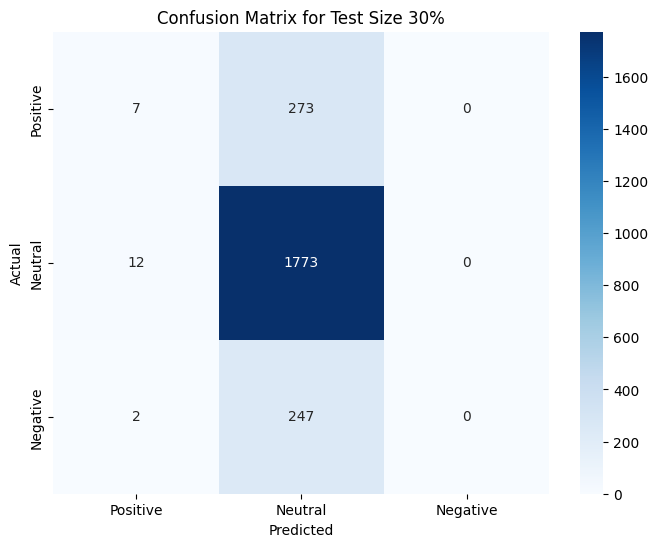

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

Test Size 40%
Confusion Matrix:
[[  12  371    0]
 [  10 2368    0]
 [   1  324    0]]
Classification Report:
              precision    recall  f1-score   support

    negative       0.52      0.03      0.06       383
     neutral       0.77      1.00      0.87      2378
    positive       0.00      0.00      0.00       325

    accuracy                           0.77      3086
   macro avg       0.43      0.34      0.31      3086
weighted avg       0.66      0.77      0.68      3086





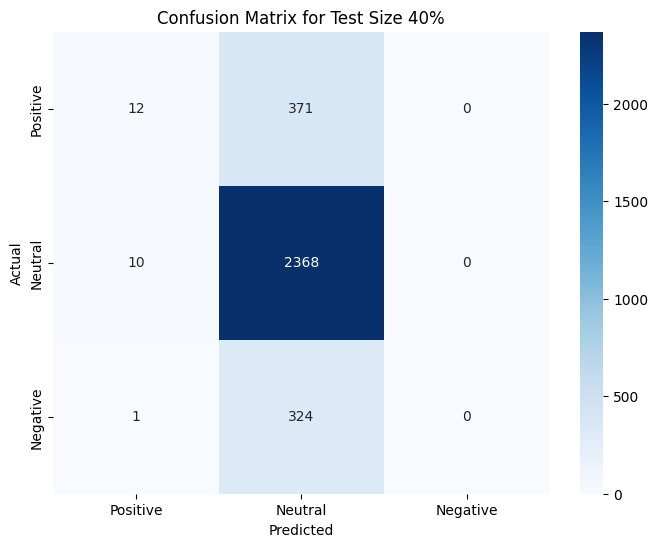

In [ ]:
from gensim.models import Word2Vec

# Latih model Word2Ve/c
model = Word2Vec(sentences=df['stop_text'], vector_size=100, window=5, min_count=1, workers=4)

# Fungsi untuk mendapatkan representasi dokumen
def document_vector(doc):
    # Hapus kata-kata yang tidak ada di dalam vocabulary
    doc = [word for word in doc if word in model.wv.index_to_key]
    return np.mean(model.wv[doc], axis=0) if doc else np.zeros(100)

# Mendapatkan representasi dokumen untuk setiap teks
df['doc_vector'] = df['stop_text'].apply(document_vector)

# Konversi daftar vektor menjadi array 2D
X = np.vstack(df['doc_vector'].values)
y = df['Sentiment']

# Fungsi untuk evaluasi model
def evaluate_model(X_train, X_test, y_train, y_test):
    # Latih model logistic regression
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Prediksi dan evaluasi
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    return cm, report

# Fungsi untuk plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Define test sizes for the desired splits
test_sizes = [0.1, 0.2, 0.3, 0.4]
classes = ['Positive', 'Neutral','Negative']

# Evaluate the model with different splits
results = {}
for test_size in test_sizes:
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Evaluate model
    cm, report = evaluate_model(X_train, X_test, y_train, y_test)

    # Store results
    results[test_size] = {
        'confusion_matrix': cm,
        'classification_report': report
    }

    # Print results for the current test size
    print(f"Test Size {test_size*100:.0f}%")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(report)
    print("\n")

    # Plot confusion matrix
    plot_confusion_matrix(cm, classes, title=f'Confusion Matrix for Test Size {test_size*100:.0f}%')

In [ ]:
# '''function to downsample'''

# def downSample(data, class_label, num_samples):
#     class_indices = df.index[df['Sentiment'] == class_label]
#     remove_indices = np.random.choice(class_indices, num_samples, replace=False)
#     return df.drop(index=remove_indices)

# '''call function to downsample neutral class '''

# dataFinal = downSample(data, 'neutral' , 4000)


**Saving Model & Tokenizer**

In [ ]:
import joblib
import pickle

# Save the model
joblib.dump(logModel, 'model.joblib')

pickle.dump(vectorizer, open("/tokenizer.pkl", "wb"))

In [ ]:
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

# **Lexicon Based Method**

In [ ]:
!gdown --id 1HVydsM-fsSdIugnuSF6L9-Ai4UnRB_ju

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1HVydsM-fsSdIugnuSF6L9-Ai4UnRB_ju
To: /content/lexicon_negative_ver1.csv
100% 82.8k/82.8k [00:00<00:00, 66.5MB/s]


In [ ]:
!gdown --id 1hOYYAYMGSd0JoqDcBxjhtVm6koOnk-KQ


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1hOYYAYMGSd0JoqDcBxjhtVm6koOnk-KQ
To: /content/lexicon_positive_ver1.csv
100% 41.4k/41.4k [00:00<00:00, 70.6MB/s]


In [ ]:
lexicon_positive = dict()
import csv
with open('lexicon_positive_ver1.csv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('lexicon_negative_ver1.csv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    lexicon_negative[row[0]] = int(row[1])

In [ ]:
def sentiment_analysis_lexicon_indonesia(text):
  score = 0
  for word_pos in text:
    if (word_pos in lexicon_positive):
      score = score + lexicon_positive[word_pos]
  for word_neg in text:
    if (word_neg in lexicon_negative):
      score = score + lexicon_negative[word_neg]
  polarity=''
  if (score > 0):
    polarity = 'positive'
  elif (score < 0):
    polarity = 'negative'
  else:
    polarity = 'neutral'

  return score, polarity

In [ ]:
df['prepos_text'] = df.stem_text.str.split()

In [ ]:
df

,created_at,Komentar,Sentiment,Score,month_year,clean_text,normalization,final_text,token,stop_text,stem_text,doc_vector,prepos_text,polarity_score,polarity
0,2023-02-03 00:49:51+00:00,Semalem berhasil bayar pake QRIS https://t.co/...,neutral,0.989646,2023-02,semalem berhasil bayar pake qris,semalem berhasil bayar pakai qris,semalem berhasil bayar pakai qris,"['semalem', 'berhasil', 'bayar', 'pake', 'qris']","['semalem', 'berhasil', 'bayar', 'pake', 'qris']",semalem hasil bayar pake qris,"[0.0033405665, -0.32098326, -0.23806389, 0.135...",[],0,neutral
1,2023-02-03 15:31:50+00:00,*mbeli gula* mw bayar tunai atau debit? bs pak...,negative,0.775546,2023-02,mbeli gula mw bayar tunai atau debit bs pake q...,membeli gula mau bayar tunai atau debit bisa p...,membeli gula bayar tunai atau debit bisa paka...,"['mbeli', 'gula', 'mw', 'bayar', 'tunai', 'ata...","['mbeli', 'gula', 'mw', 'bayar', 'tunai', 'deb...",mbeli gula mw bayar tunai debit bs pake qris w...,"[-0.034949742, -0.32351488, -0.24557899, 0.087...",[],0,neutral
2,2023-02-04 05:24:06+00:00,Orang Kristen tidak suka bayar tunai/cash kare...,negative,0.958232,2023-02,orang kristen tidak suka bayar tunaicash karen...,orang kristen tidak suka bayar tunaicash karen...,orang kristen tidak suka bayar tunaicash karen...,"['orang', 'kristen', 'tidak', 'suka', 'bayar',...","['orang', 'kristen', 'suka', 'bayar', 'tunaica...",orang kristen suka bayar tunaicash dosa bayar ...,"[-0.018780725, -0.33245778, -0.27423283, 0.146...",[],0,neutral
3,2023-02-04 05:24:06+00:00,ken arok kalo bayar pake qris mpu gandring,neutral,0.983039,2023-02,ken arok kalo bayar pake qris mpu gandring,ken arok kalau bayar pakai qris mpu gandring,arok kalau bayar pakai qris gandring,"['ken', 'arok', 'kalo', 'bayar', 'pake', 'qris...","['ken', 'arok', 'kalo', 'bayar', 'pake', 'qris...",ken arok kalo bayar pake qris mpu gandring,"[-0.010888764, -0.3451855, -0.2246122, 0.15251...",[],0,neutral
4,2023-02-04 05:36:21+00:00,@Askrlfess Coba diliat ditatonya nder Kali aja...,neutral,0.987434,2023-02,coba diliat ditatonya nder kali aja ada qris n...,coba diliat ditatonya nder kali saja ada qris ...,coba diliat ditatonya nder kali saja qris b...,"['coba', 'diliat', 'ditatonya', 'nder', 'kali'...","['coba', 'diliat', 'ditatonya', 'nder', 'kali'...",coba liat tato nder kali aja qris ntr bayar si...,"[-0.017536098, -0.3090973, -0.24870853, 0.1361...",[],0,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7708,2024-06-24 04:55:11+00:00,haii haii kyu ada saldo receh nominal rahasia ...,neutral,0.975304,2024-06,haii kyu ada saldo receh nominal rahasia buat ...,haii kyu ada saldo receh nominal rahasia buat ...,haii saldo receh nominal rahasia buat yang ...,"['haii', 'kyu', 'ada', 'saldo', 'receh', 'nomi...","['haii', 'kyu', 'saldo', 'receh', 'nominal', '...",hai kyu saldo receh nominal rahasia ba qris ru...,"[-0.051647257, -0.27949566, -0.2454353, 0.1380...",[],0,neutral
7709,2024-06-24 06:10:37+00:00,Banyak orang gatau kalau nyari duit itu segamp...,neutral,0.869174,2024-06,banyak orang gatau kalau nyari duit itu segamp...,banyak orang tidak tahu kalau mencari uang itu...,banyak orang tidak tahu kalau mencari uang se...,"['banyak', 'orang', 'gatau', 'kalau', 'nyari',...","['orang', 'gatau', 'nyari', 'duit', 'segampang...",orang gatau nyari duit gampang main slot gacor...,"[-0.015102547, -0.35399133, -0.2358701, 0.1217...",[],0,neutral
7710,2024-06-24 06:23:05+00:00,Di aku ready nih kak! Murce murce all e-wallet...,neutral,0.992647,2024-06,di aku ready nih kak murce all ewallet amp qri...,di aku siap ni kak murah all ewallet amp qris ...,siap murah ewallet qris direct message ...,"['di', 'aku', 'ready', 'nih', 'kak', 'murce', ...","['ready', 'nih', 'kak', 'murce', 'all', 'ewall...",ready nih kak murce all ewallet amp qris dm or wa,"[-0.04119383, -0.2552959, -0.23252876, 0.17584...",[],0,neutral
7711,2024-06-24 07:09:20+00:00,mau netflix 1 bulan yg bs qris #zonauang,neutral,0.996733,2024-06,mau netflix bulan yg

In [ ]:
df['prepos_text'] = df['prepos_text'].fillna('')

# Convert the prepos_text column to lists of strings, handling non-string values
df['prepos_text'] = df['prepos_text'].apply(lambda x: x.split() if isinstance(x, str) else [])  # Convert non-strings to empty lists

polarity
neutral    7713
Name: count, dtype: int64


In [ ]:
results = df['prepos_text'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['polarity_score'] = results[0]
df['polarity'] = results[1]
print(df['polarity'].value_counts())

polarity
neutral    7713
Name: count, dtype: int64


In [ ]:
df['polarity'] = df['polarity'].replace({'positive': 0, 'neutral': 1, 'negative': 2}).astype(int)

In [ ]:
df

,created_at,Komentar,Sentiment,Score,month_year,clean_text,normalization,final_text,token,stop_text,stem_text,doc_vector,prepos_text,polarity_score,polarity
0,2023-02-03 00:49:51+00:00,Semalem berhasil bayar pake QRIS https://t.co/...,neutral,0.989646,2023-02,semalem berhasil bayar pake qris,semalem berhasil bayar pakai qris,semalem berhasil bayar pakai qris,"['semalem', 'berhasil', 'bayar', 'pake', 'qris']","['semalem', 'berhasil', 'bayar', 'pake', 'qris']",semalem hasil bayar pake qris,"[0.0033405665, -0.32098326, -0.23806389, 0.135...",[],0,1
1,2023-02-03 15:31:50+00:00,*mbeli gula* mw bayar tunai atau debit? bs pak...,negative,0.775546,2023-02,mbeli gula mw bayar tunai atau debit bs pake q...,membeli gula mau bayar tunai atau debit bisa p...,membeli gula bayar tunai atau debit bisa paka...,"['mbeli', 'gula', 'mw', 'bayar', 'tunai', 'ata...","['mbeli', 'gula', 'mw', 'bayar', 'tunai', 'deb...",mbeli gula mw bayar tunai debit bs pake qris w...,"[-0.034949742, -0.32351488, -0.24557899, 0.087...",[],0,1
2,2023-02-04 05:24:06+00:00,Orang Kristen tidak suka bayar tunai/cash kare...,negative,0.958232,2023-02,orang kristen tidak suka bayar tunaicash karen...,orang kristen tidak suka bayar tunaicash karen...,orang kristen tidak suka bayar tunaicash karen...,"['orang', 'kristen', 'tidak', 'suka', 'bayar',...","['orang', 'kristen', 'suka', 'bayar', 'tunaica...",orang kristen suka bayar tunaicash dosa bayar ...,"[-0.018780725, -0.33245778, -0.27423283, 0.146...",[],0,1
3,2023-02-04 05:24:06+00:00,ken arok kalo bayar pake qris mpu gandring,neutral,0.983039,2023-02,ken arok kalo bayar pake qris mpu gandring,ken arok kalau bayar pakai qris mpu gandring,arok kalau bayar pakai qris gandring,"['ken', 'arok', 'kalo', 'bayar', 'pake', 'qris...","['ken', 'arok', 'kalo', 'bayar', 'pake', 'qris...",ken arok kalo bayar pake qris mpu gandring,"[-0.010888764, -0.3451855, -0.2246122, 0.15251...",[],0,1
4,2023-02-04 05:36:21+00:00,@Askrlfess Coba diliat ditatonya nder Kali aja...,neutral,0.987434,2023-02,coba diliat ditatonya nder kali aja ada qris n...,coba diliat ditatonya nder kali saja ada qris ...,coba diliat ditatonya nder kali saja qris b...,"['coba', 'diliat', 'ditatonya', 'nder', 'kali'...","['coba', 'diliat', 'ditatonya', 'nder', 'kali'...",coba liat tato nder kali aja qris ntr bayar si...,"[-0.017536098, -0.3090973, -0.24870853, 0.1361...",[],0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7708,2024-06-24 04:55:11+00:00,haii haii kyu ada saldo receh nominal rahasia ...,neutral,0.975304,2024-06,haii kyu ada saldo receh nominal rahasia buat ...,haii kyu ada saldo receh nominal rahasia buat ...,haii saldo receh nominal rahasia buat yang ...,"['haii', 'kyu', 'ada', 'saldo', 'receh', 'nomi...","['haii', 'kyu', 'saldo', 'receh', 'nominal', '...",hai kyu saldo receh nominal rahasia ba qris ru...,"[-0.051647257, -0.27949566, -0.2454353, 0.1380...",[],0,1
7709,2024-06-24 06:10:37+00:00,Banyak orang gatau kalau nyari duit itu segamp...,neutral,0.869174,2024-06,banyak orang gatau kalau nyari duit itu segamp...,banyak orang tidak tahu kalau mencari uang itu...,banyak orang tidak tahu kalau mencari uang se...,"['banyak', 'orang', 'gatau', 'kalau', 'nyari',...","['orang', 'gatau', 'nyari', 'duit', 'segampang...",orang gatau nyari duit gampang main slot gacor...,"[-0.015102547, -0.35399133, -0.2358701, 0.1217...",[],0,1
7710,2024-06-24 06:23:05+00:00,Di aku ready nih kak! Murce murce all e-wallet...,neutral,0.992647,2024-06,di aku ready nih kak murce all ewallet amp qri...,di aku siap ni kak murah all ewallet amp qris ...,siap murah ewallet qris direct message ...,"['di', 'aku', 'ready', 'nih', 'kak', 'murce', ...","['ready', 'nih', 'kak', 'murce', 'all', 'ewall...",ready nih kak murce all ewallet amp qris dm or wa,"[-0.04119383, -0.2552959, -0.23252876, 0.17584...",[],0,1
7711,2024-06-24 07:09:20+00:00,mau netflix 1 bulan yg bs qris #zonauang,neutral,0.996733,2024-06,mau netflix bulan yg bs qris,mau netflix bulan yang bisa qris,netfli

In [ ]:
print(classification_report(df['Sentiment'], df['polarity']))

In [ ]:
print(classification_report(df['Sentiment'], df['polarity']))

              precision    recall  f1-score   support

           0       0.81      0.09      0.17      5632
           1       0.21      0.64      0.31       999
           2       0.14      0.66      0.24       817

    accuracy                           0.23      7448
   macro avg       0.39      0.46      0.24      7448
weighted avg       0.66      0.23      0.20      7448

